In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
df =  pd.read_csv("../../Data/DR3/espectros_normalizados_balanceados_SNG_1.csv")

In [7]:
df =  df.rename(columns={'col344': "id"})

In [8]:
# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']


In [9]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [10]:

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [11]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [12]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
76/76 [==============================] - 2s 5ms/step - loss: 0.8615 - accuracy: 0.6026 - val_loss: 0.6110 - val_accuracy: 0.8007
Epoch 2/50
76/76 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7943 - val_loss: 0.4875 - val_accuracy: 0.8171
Epoch 3/50
76/76 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8100 - val_loss: 0.4457 - val_accuracy: 0.8418
Epoch 4/50
76/76 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8331 - val_loss: 0.3934 - val_accuracy: 0.8567
Epoch 5/50
76/76 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8533 - val_loss: 0.3974 - val_accuracy: 0.8682
Epoch 6/50
76/76 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8644 - val_loss: 0.3429 - val_accuracy: 0.8814
Epoch 7/50
76/76 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8607 - val_loss: 0.3365 - val_accuracy: 0.8830
Epoch 8/50
76/76 [==

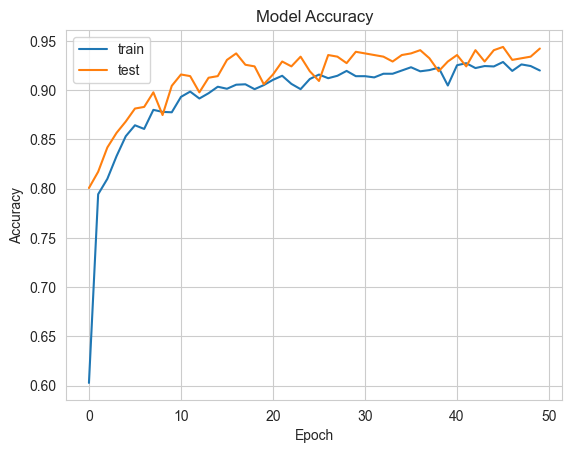

In [13]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [17]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 1ms/step
[[189   4   6]
 [ 10 180  13]
 [  0   2 203]]


In [18]:
import csv
# Save as CSV
with open("cm_rna_balanced.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cm)

In [19]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9497    0.9497    0.9497       199
           1     0.9677    0.8867    0.9254       203
           2     0.9144    0.9902    0.9508       205

    accuracy                         0.9423       607
   macro avg     0.9440    0.9422    0.9420       607
weighted avg     0.9438    0.9423    0.9420       607



In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.942339373970346


In [21]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (2426, 343)
X_test:  (607, 343)
y_test:  607
y_pred:  607


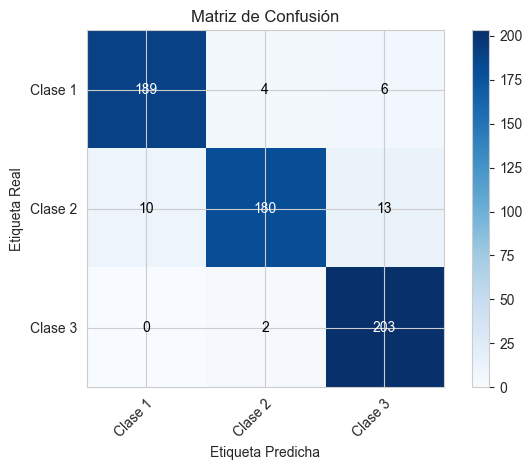

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ejemplo de matriz de confusión
# Cambia estos valores con tu propia matriz de confusión
# Aquí se muestra una matriz de 3x3 como ejemplo
# cm = np.array([[10, 2, 0],
#                [3, 15, 1],
#                [1, 0, 12]])

# Etiquetas de las clases
# Cambia estas etiquetas con las correspondientes a tu problema
labels = ['Clase 1', 'Clase 2', 'Clase 3']

# Crear la figura y el eje
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Añadir detalles al gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Matriz de Confusión',
       ylabel='Etiqueta Real',
       xlabel='Etiqueta Predicha')

# Rotar las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Mostrar los valores de la matriz en cada celda
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Ajustar el diseño y mostrar el gráfico
fig.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    ax.set_xlabel('Etiqueta Predicha')
    ax.set_ylabel('Etiqueta Verdadera')
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes, rotation=0)
    ax.set_title('Matriz de Confusión')


# Ejemplo de uso
confusion_matrix = cm
class_names = ['SY', 'Clase 2', 'Clase 3']
plot_confusion_matrix(confusion_matrix, class_names)
plt.show()